In [73]:
import numpy as np
import pandas as pd
import talib 
from datetime import datetime
from binance.client import Client

In [90]:
client = Client('JLCON0ZJ9v4zX595o2W1rlvSIhIercTu2ugNLCMPZ88QAt8zvSe2vY3LDiiRjKMB','JMnozKSUlep8mBrXCW1b7mAdHDl5qcYv3GDfNOquyifCdbD4QmGXILR9A5V0FgKf') 
start_str = 'Jun 15 2022'
end_str = 'DEC 15 2024'
coin ='SOL'
klines = client.get_historical_klines(symbol=f'{coin}USDT', interval=client.KLINE_INTERVAL_4HOUR, start_str=start_str,end_str=end_str)  
df = pd.DataFrame(klines)
df = df.iloc[:,:6] 
df.columns = ['time','open','high','low','close','volume']
df = df.astype(float) 
df['time'] = [datetime.fromtimestamp(ts / 1000) for ts in df['time']] 
df1  = df

In [93]:
open = df['open']
high = df['high']
low  = df['low']
close = df['close']
volume = df['volume']
df.dropna()
avg = (df['high'] + df['low']) / 2


df['BBANDS_upperband'], df['BBANDS_middleband'], df['BBANDS_lowerband'] = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
df['BBANDS_upperband'] = (df['BBANDS_upperband'] - avg) / close
df['BBANDS_middleband'] = (df['BBANDS_middleband'] - avg) / close
df['BBANDS_lowerband'] = (df['BBANDS_lowerband'] - avg) / close
df['DEMA'] = (talib.DEMA(close, timeperiod=30) - avg) / close
df['EMA'] = (talib.EMA(close, timeperiod=30) - avg) / close
df['HT_TRENDLINE'] = (talib.HT_TRENDLINE(close) - avg) / close
df['KAMA'] = (talib.KAMA(close, timeperiod=30) - avg) / close
df['MA'] = (talib.MA(close, timeperiod=30, matype=0) - avg) / close
df['MIDPOINT'] = (talib.MIDPOINT(close, timeperiod=14) - avg) / close
df['SMA'] = (talib.SMA(close, timeperiod=30) - avg) / close
df['T3'] = (talib.T3(close, timeperiod=5, vfactor=0) - avg) / close
df['TEMA'] = (talib.TEMA(close, timeperiod=30) - avg) / close
df['TRIMA'] = (talib.TRIMA(close, timeperiod=30) - avg) / close
df['WMA'] = (talib.WMA(close, timeperiod=30) - avg) / close
df['LINEARREG'] = (talib.LINEARREG(close, timeperiod=14) - close) / close
df['LINEARREG_INTERCEPT'] = (talib.LINEARREG_INTERCEPT(close, timeperiod=14) - close) / close

df['AD'] = talib.AD(high, low, close, volume) / close
df['ADOSC'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10) / close
df['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0) / close
df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = talib.HT_PHASOR(close)
df['HT_PHASOR_inphase'] /= close
df['HT_PHASOR_quadrature'] /= close
df['LINEARREG_SLOPE'] = talib.LINEARREG_SLOPE(close, timeperiod=14) / close
df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD_macd'] /= close
df['MACD_macdsignal'] /= close
df['MACD_macdhist'] /= close
df['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14) / close
df['MOM'] = talib.MOM(close, timeperiod=10) / close
df['OBV'] = talib.OBV(close, volume) / close
df['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14) / close
df['STDDEV'] = talib.STDDEV(close, timeperiod=5, nbdev=1) / close
df['TRANGE'] = talib.TRANGE(high, low, close) / close


df['ADX'] = talib.ADX(high, low, close, timeperiod=14)
df['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
df['AROON_aroondown'], df['AROON_aroonup'] = talib.AROON(high, low, timeperiod=14)
df['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
df['BOP'] = talib.BOP(open, high, low, close)
df['CCI'] = talib.CCI(high, low, close, timeperiod=14)
df['DX'] = talib.DX(high, low, close, timeperiod=14)

df['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
df['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
df['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
df['RSI'] = talib.RSI(close, timeperiod=14)
df['STOCH_slowk'], df['STOCH_slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df['STOCHF_fastk'], df['STOCHF_fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df['TRIX'] = talib.TRIX(close, timeperiod=30)
df['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
df['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)

df['ATR'] = talib.ATR(high, low, close, timeperiod=14)  
df['NATR'] = talib.NATR(high, low, close, timeperiod=14)

df['HT_DCPERIOD'] = talib.HT_DCPERIOD(close)
df['HT_DCPHASE'] = talib.HT_DCPHASE(close)
df['HT_SINE_sine'], df['HT_SINE_leadsine'] = talib.HT_SINE(close)
df['HT_TRENDMODE'] = talib.HT_TRENDMODE(close)

df['BETA'] = talib.BETA(high, low, timeperiod=5)
df['CORREL'] = talib.CORREL(high, low, timeperiod=30)

df['LINEARREG_ANGLE'] = talib.LINEARREG_ANGLE(close, timeperiod=14)


In [76]:

diff = (df['high'] - df['low'])
#
diff =diff.median()
pipdiff = diff
SLTPRatio = 2   


def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length

    for line in range(0, length - barsupfront - 2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1, barsupfront + 2):
            value1 = open[line + 1] - low[line + i]
            value2 = open[line + 1] - high[line + i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ((valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff / SLTPRatio))):
                trendcat[line] = 1  #  downtrend
                break
            elif ((valueOpenLow <= (pipdiff / SLTPRatio)) and (-valueOpenHigh >= pipdiff)):
                trendcat[line] = 2  # uptrend
                break
            else:
                trendcat[line] = 0  # no clear trend

    return trendcat
df['mytarget'] = mytarget(4, df) 
df.to_csv('target.csv',index =False)

In [77]:
features = sorted([
    'ADX',
    'ADXR',
    'APO',
    'AROON_aroondown',
    'AROON_aroonup',
    'AROONOSC',
    'CCI',
    'DX',
    'MACD_macd',
    'MACD_macdsignal',
    'MACD_macdhist',
    'MFI',
    'MOM',
    'RSI',
    'STOCH_slowk',
    'STOCH_slowd',
    'STOCHF_fastk',

    'ULTOSC',
    'WILLR',

    'HT_DCPERIOD',
    'HT_DCPHASE',
    'HT_PHASOR_inphase',
    'HT_PHASOR_quadrature',
    'HT_TRENDMODE',
    'BETA',
    'LINEARREG',
    'LINEARREG_ANGLE',
    'LINEARREG_INTERCEPT',
    'LINEARREG_SLOPE',
    'STDDEV',
    'BBANDS_upperband',
    'BBANDS_middleband',
    'BBANDS_lowerband',
    'DEMA',
    'EMA',
    'HT_TRENDLINE',
    'KAMA',
    'MA',
    'MIDPOINT',
    'T3',
    'TEMA',
    'TRIMA',
    'WMA',
])
df = df.dropna()
X = df[features]
y = df["mytarget"]


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
pred_test = xgbmodel.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print("Accuracy: {:.4%}".format(acc_test))
print(classification_report(pred_test,y_test))
print('----------------------------')

Accuracy: 64.4037%
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1455
           1       0.11      0.35      0.17        88
           2       0.10      0.33      0.16        92

    accuracy                           0.64      1635
   macro avg       0.38      0.45      0.37      1635
weighted avg       0.84      0.64      0.72      1635

----------------------------


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lnmodel = LinearRegression()
lnmodel.fit(X_train, y_train)
y_pred = lnmodel.predict(X_test)
y_pred = np.round(y_pred)
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Accuracy:", acc)

Mean Squared Error: 0.7859327217125383
Accuracy: 0.37920489296636084


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model with softmax (multi_class='multinomial')
smmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model
smmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = smmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%") 

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 65.63%
              precision    recall  f1-score   support

         0.0       0.66      1.00      0.79      1072
         1.0       1.00      0.00      0.01       273
         2.0       0.00      0.00      0.00       290

    accuracy                           0.66      1635
   macro avg       0.55      0.33      0.27      1635
weighted avg       0.60      0.66      0.52      1635



c:\Users\Admin\anaconda3\envs\ta-lib-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Admin\anaconda3\envs\ta-lib-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Admin\anaconda3\envs\ta-lib-env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [82]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes model
nbmodel = GaussianNB()

# Train the model
nbmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nbmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%") 

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 49.36%
              precision    recall  f1-score   support

         0.0       0.69      0.60      0.64      1072
         1.0       0.20      0.23      0.21       273
         2.0       0.27      0.35      0.30       290

    accuracy                           0.49      1635
   macro avg       0.38      0.39      0.38      1635
weighted avg       0.53      0.49      0.51      1635



In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Khởi tạo mô hình Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Tính độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%") 
# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 55.84%
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.71      1072
         1.0       0.28      0.27      0.27       273
         2.0       0.27      0.30      0.28       290

    accuracy                           0.56      1635
   macro avg       0.42      0.42      0.42      1635
weighted avg       0.56      0.56      0.56      1635



In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%") 

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 65.50%
              precision    recall  f1-score   support

         0.0       0.66      0.98      0.79      1072
         1.0       0.56      0.05      0.09       273
         2.0       0.28      0.02      0.03       290

    accuracy                           0.66      1635
   macro avg       0.50      0.35      0.31      1635
weighted avg       0.58      0.66      0.54      1635



In [91]:
## Lưu lại model đã train , để cập nhật model thì chỉ cần dùng đến chúc năng Save Model là được.
import joblib

# Save Model
filename = 'mymodel1.sav'
joblib.dump(xgbmodel, filename)

# # load the model from disk
loaded_model = joblib.load('mymodel1.sav')

Số lần mua : 148 Số lần bán : 148 Số lần giữ : 5681
Số dư tài khoản hiện có : 10814.794604881574


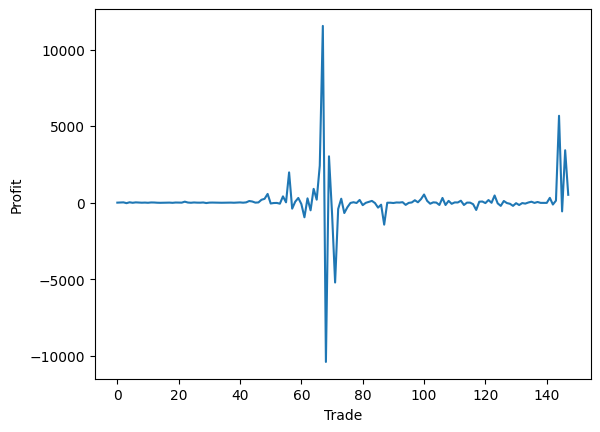

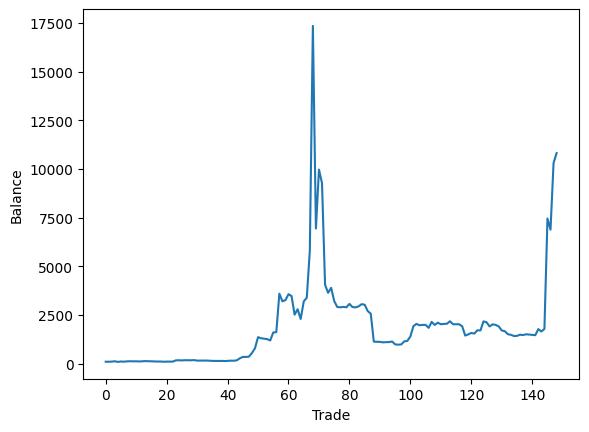

17344.494118885334


In [94]:
import matplotlib.pyplot as plt

balance = 100.00
tokenunit = 0.00
dif = []
dif.append(100)
buy = True
buys =[]
sells = []
count0 = 0
count1 = 0
count2 = 0
sum =0
for i in range(len(df)) :
    X_stream  = df.iloc[[i]]
    X_model = X_stream[features]
    
    ModelPrediction = loaded_model.predict(X_model)
    #Buy Signal
    if ModelPrediction == 2 and buy == True :
         tokenunit = balance/(df['close'].iloc[i]+ df['close'].iloc[i]*0.0005)
         buys.append([df['time'].iloc[i],df['close'].iloc[i],balance])
         buy = False
         count2 = count2 +1
    # if balance-balance*0.3 > tokenunit*(df['close'].iloc[i] - df['close'].iloc[i]*0.0005) and buy == False:
    #     balance = tokenunit*(df['close'].iloc[i] - df['close'].iloc[i]*0.0005)
    #     sells.append([df['time'].iloc[i],df['close'].iloc[i],balance])
    #     tokenunit=0
    #     sum = sum +1
    #     i+= 34
    #     buy = True
    if ModelPrediction == 1 and buy == False :
        balance = tokenunit*(df['close'].iloc[i] - df['close'].iloc[i]*0.0005)
        dif.append(balance)
        sells.append([df['time'].iloc[i],df['close'].iloc[i],balance])
        tokenunit=0
        sum = sum +1
        buy = True
        count1 = count1 +1
    if ModelPrediction == 0 :
        count0 = count0 +1

print("Số lần mua :",count2,"Số lần bán :",count1,"Số lần giữ :",count0)
win = 0
profit = []
for i in range(len(sells)) :
    profit.append(sells[i][2] - buys[i][2])
    if profit[i] > 0 :
        win = win +1
print("Số dư tài khoản hiện có :",balance)
plt.plot(profit)
plt.ylabel('Profit')
plt.xlabel('Trade')

plt.show()

plt.plot(dif)
plt.ylabel('Balance')
plt.xlabel('Trade')
plt.show()
print(max(dif))

In [87]:
buyedp =[]
buyedt = []
selledp =[]
selledt = []
for i in range(len(buys)) :
    buyedp.append(buys[i][1])
    buyedt.append(buys[i][0])
for i in range(len(sells)) :
    selledp.append(sells[i][1])
    selledt.append(sells[i][0])

import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import pandas as pd
fig = go.Figure(data=[go.Candlestick(x=df1['time'],
                                     open=df1['open'],
                                     high=df1['high'],
                                     low=df1['low'],
                                     close=df1['close'])])
fig.add_trace(go.Scatter(x=buyedt, y=buyedp, mode='markers', marker=dict(color='blue'), name='Mua'))
fig.add_trace(go.Scatter(x=selledt, y=selledp, mode='markers', marker=dict(color='red'), name='Bán'))
fig.update_layout(title='Biểu đồ nến với điểm mua và bán', yaxis_title='Giá')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
## token cung he thi co the dung chung model 
## TEST voi same model thi chinh ngay du lieu train =/ test 
## Cac coin cung loai vi du btc eth cung 1 tang , sol near link ... cung 1 tang co the dung chung model 
## Trade altcoin thi tot nhat nen them SL = 10-30%  
## Viec chon data train rat quan trong => nen chon data train co du xu huong tang giam ro rang  vi du BTC ~ 
start_str = 'Jan 1 2021' 
end_str = 'Jul 15 2022' 
# 0.4967 16:18 Gia du dooan down 